In [ ]:
import pandas as pd
import numpy as np
import cv2
import os 
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [ ]:
!cp  /content/drive/MyDrive/natural_images.zip . #non-face_dataset
! unzip /content/natural_images.zip

Streaming output truncated to the last 5000 lines.
  inflating: natural_images/0 (162).jpg  
  inflating: natural_images/0 (163).jpg  
  inflating: natural_images/0 (164).jpg  
  inflating: natural_images/0 (165).jpg  
  inflating: natural_images/0 (166).jpg  
  inflating: natural_images/0 (167).jpg  
  inflating: natural_images/0 (168).jpg  
  inflating: natural_images/0 (169).jpg  
  inflating: natural_images/0 (17).jpg  
  inflating: natural_images/0 (170).jpg  
  inflating: natural_images/0 (171).jpg  
  inflating: natural_images/0 (172).jpg  
  inflating: natural_images/0 (173).jpg  
  inflating: natural_images/0 (174).jpg  
  inflating: natural_images/0 (175).jpg  
  inflating: natural_images/0 (176).jpg  
  inflating: natural_images/0 (177).jpg  
  inflating: natural_images/0 (178).jpg  
  inflating: natural_images/0 (179).jpg  
  inflating: natural_images/0 (18).jpg  
  inflating: natural_images/0 (180).jpg  
  inflating: natural_images/0 (181).jpg  
  inflating: natural_images

In [ ]:
natural_images= os.listdir("natural_images")

In [ ]:
NonfaceDataset=[]
NonLabals=[]
for path in natural_images:
  img = cv2.imread("natural_images/"+path)
  img = cv2.resize(img, (48,48))
  NonfaceDataset.append(img)
  NonLabals.append(0)

In [ ]:
len(NonfaceDataset)

5070

In [ ]:
!cp  /content/drive/MyDrive/Humans.zip . #face_dataset
! unzip /content/Humans.zip

Streaming output truncated to the last 5000 lines.
  inflating: Humans/1 (2910).jpg     
  inflating: Humans/1 (2911).jpg     
  inflating: Humans/1 (2912).jpg     
  inflating: Humans/1 (2913).jpg     
  inflating: Humans/1 (2914).jpg     
  inflating: Humans/1 (2915).jpg     
  inflating: Humans/1 (2916).jpg     
  inflating: Humans/1 (2917).jpg     
  inflating: Humans/1 (2918).jpg     
  inflating: Humans/1 (2919).jpg     
  inflating: Humans/1 (292).jpg      
  inflating: Humans/1 (2920).jpg     
  inflating: Humans/1 (2921).jpg     
  inflating: Humans/1 (2922).jpg     
  inflating: Humans/1 (2923).jpg     
  inflating: Humans/1 (2924).jpg     
  inflating: Humans/1 (2925).jpg     
  inflating: Humans/1 (2926).jpg     
  inflating: Humans/1 (2927).jpg     
  inflating: Humans/1 (2928).jpg     
  inflating: Humans/1 (2929).jpg     
  inflating: Humans/1 (293).jpg      
  inflating: Humans/1 (2930).jpg     
  inflating: Humans/1 (2931).jpg     
  inflating: Humans/1 (2932).jpg     

In [ ]:
Humans= os.listdir("Humans")

In [ ]:
faceDataset=[]
Labals=[]

In [ ]:
len(faceDataset)

5610

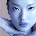

(36, 36, 3)


In [ ]:
cv2_imshow(faceDataset[0])
print(faceDataset[0].shape)

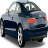

(48, 48, 3)


In [ ]:
cv2_imshow(NonfaceDataset[0])
print(NonfaceDataset[0].shape)

In [ ]:
dataset=faceDataset + NonfaceDataset
dataset_Labels=Labals + NonLabals

In [ ]:
len(dataset)

10680

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, dataset_Labels, test_size=0.2, random_state=42)

In [ ]:
##preprossing 
def  preprocessing(img):
    gray_original_image = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),(48,48))
    gray_original_image=gray_original_image/255
    return gray_original_image

In [ ]:
#features_

In [ ]:
def Hog_features(img):
    img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),(48,48))
    img = img.astype(int)
    # show_images([img])

    target_img_size = (128, 128)
    img = cv2.resize(img.astype('uint8'), target_img_size)
    win_size = (24, 24)
    cell_size = (8, 8)
    block_size_in_cells = (2, 2)

    block_size = (block_size_in_cells[1] * cell_size[1],
                  block_size_in_cells[0] * cell_size[0])
    block_stride = (cell_size[1], cell_size[0])
    nbins = 15  # Number of orientation bins
    hog = cv2.HOGDescriptor(win_size, block_size,
                            block_stride, cell_size, nbins)
    h = hog.compute(img)
    h = h.flatten()

    return h.flatten()

In [ ]:
def get_integralimage (img): 
    height,width=img.shape
    integral_image= np.zeros((height+1,width+1))#to add maargin 0 on top and on right
    for i in range(height):
        for j in range(width):
            integral_image[i][j]=img[i][j]+integral_image[i-1][j]+integral_image[i][j-1]-integral_image[i-1][j-1]#because we add the right top pixcel twice
    return integral_image     

In [ ]:
def get_LeftrightHaarfeatures(integral_image,window_height,window_width):
    LeftrightHaarfeatures=[]
    window_width_half=int(window_width/2)
#    print(integral_image.shape[0],integral_image.shape[1],window_width_half,window_height,window_width)
    i=0
    j=0
    while(i+window_height<integral_image.shape[0]):
        while(j+window_width<integral_image.shape[1]):
      #      print(i,j)
            white_Pixels_inHaar = integral_image[i+window_height][j+window_width_half]-integral_image[i+window_height][j]-integral_image[i][j+window_width_half]+integral_image[i][j]
            black_Pixels_inHaar = integral_image[i+window_height][j+window_width]-integral_image[i+window_height][j+window_width_half]-integral_image[i][j+window_width]+integral_image[i][j+window_width_half]
   #         print(integral_image[i+window_height][j+window_width_half],integral_image[i+window_height][j],integral_image[i][j+window_width_half],integral_image[i][j],white_Pixels_inHaar,integral_image[i+window_height][j+window_width],integral_image[i+window_height][j+window_width_half],integral_image[i][j+window_width],integral_image[i][j+window_width_half],black_Pixels_inHaar)
            delta=(white_Pixels_inHaar-black_Pixels_inHaar)/(window_height*window_width_half)
      #      print(delta)
            LeftrightHaarfeatures.append(delta)
            j=j+1
        i=i+1   
    return LeftrightHaarfeatures

In [ ]:
def get_topbottomHaarfeatures(integral_image,window_height,window_width):
    LeftrightHaarfeatures=[]
    window_height_half=int(window_height/2)
#    print(integral_image.shape[0],integral_image.shape[1],window_height_half,window_height,window_width)
    i=0
    j=0
    while(i+window_height<integral_image.shape[0]):
        while(j+window_width<integral_image.shape[1]):
     #       print(i,j)
            white_Pixels_inHaar = integral_image[i+window_height_half][j+window_width]-integral_image[i+window_height_half][j]-integral_image[i][j+window_width]+integral_image[i][j]
            black_Pixels_inHaar = integral_image[i+window_height][j+window_width]-integral_image[i+window_height][j]-integral_image[i+window_height_half][j+window_width]+integral_image[i+window_height_half][j]
   #         print(integral_image[i+window_height_half][j+window_width],integral_image[i+window_height_half][j],integral_image[i][j+window_width],integral_image[i][j],white_Pixels_inHaar,integral_image[i+window_height][j+window_width],integral_image[i+window_height][j],integral_image[i+window_height_half][j+window_width],integral_image[i+window_height_half][j],black_Pixels_inHaar)
            delta=(white_Pixels_inHaar-black_Pixels_inHaar)/(window_height_half*window_width)
  #          print(delta)
            LeftrightHaarfeatures.append(delta)
            j=j+1
        i=i+1   
    return LeftrightHaarfeatures

In [ ]:
def get_linehorizontalHaarfeatures(integral_image,window_height,window_width):
    linehorizontalHaarfeatures=[]
    window_width_third=int(window_width/3)
 #   print(integral_image.shape[0],integral_image.shape[1],window_width_third,window_height,window_width)
    i=0
    j=0
    while(i+window_height<integral_image.shape[0]):
        while(j+window_width<integral_image.shape[1]):
      #      print(i,j)
            white_Pixels_inHaar = integral_image[i+window_height][j+window_width_third]-integral_image[i+window_height][j]-integral_image[i][j+window_width_third]+integral_image[i][j]
            black_Pixels_inHaar = integral_image[i+window_height][j+window_width_third*2]-integral_image[i+window_height][j+window_width_third]-integral_image[i][j+window_width_third*2]+integral_image[i][j+window_width_third]
            white2_Pixels_inHaar = integral_image[i+window_height][j+window_width]-integral_image[i+window_height][j+window_width_third*2]-integral_image[i][j+window_width]+integral_image[i][j+window_width_third*2]
            delta=(white_Pixels_inHaar-black_Pixels_inHaar+white2_Pixels_inHaar)/(window_height*window_width_third)
     #       print(delta)
            linehorizontalHaarfeatures.append(delta)
            j=j+1
        i=i+1  
    return linehorizontalHaarfeatures

In [ ]:
def get_lineverticalHaarfeatures(integral_image,window_height,window_width):
    lineverticalHaarfeatures=[]
    window_height_third=int(window_height/3)
 #   print(integral_image.shape[0],integral_image.shape[1],window_height_third,window_height,window_width)
    i=0
    j=0
    while(i+window_height<integral_image.shape[0]):
        while(j+window_width<integral_image.shape[1]):
      #      print(i,j)
            white_Pixels_inHaar = integral_image[i+window_height_third][j+window_width]-integral_image[i+window_height_third][j]-integral_image[i][j+window_width]+integral_image[i][j]
            black_Pixels_inHaar = integral_image[i+window_height_third*2][j+window_width]-integral_image[i+window_height_third*2][j]-integral_image[i+window_height_third][j+window_width]+integral_image[i+window_height_third][j]
            white2_Pixels_inHaar = integral_image[i+window_height][j+window_width]-integral_image[i+window_height][j]-integral_image[i+window_height_third*2][j+window_width]+integral_image[i+window_height_third*2][j]
            delta=(white_Pixels_inHaar-black_Pixels_inHaar+white2_Pixels_inHaar)/(window_width*window_height_third)
       #     print(delta)
            lineverticalHaarfeatures.append(delta)
            j=j+1
        i=i+1    
    return lineverticalHaarfeatures

In [ ]:
def get_fourrectangleHaarfeatures(integral_image,window_height,window_width):
    fourrectangleHaarfeatures=[]
    window_width_half=int(window_width/2)
    window_height_half=int(window_height/2)
 #   print(integral_image.shape[0],integral_image.shape[1],window_height_half,window_width_half,window_height,window_width)
    i=0
    j=0
    while(i+window_height<integral_image.shape[0]):
        while(j+window_width<integral_image.shape[1]):
      #      print(i,j)
            white_Pixels_inHaar = integral_image[i+window_height_half][j+window_width_half]-integral_image[i+window_height_half][j]-integral_image[i][j+window_width_half]+integral_image[i][j]
            black_Pixels_inHaar = integral_image[i+window_height_half][j+window_width]-integral_image[i+window_height_half][j+window_width_half]-integral_image[i][j+window_width]+integral_image[i][j+window_width_half]
            white2_Pixels_inHaar = integral_image[i+window_height][j+window_width]-integral_image[i+window_height][j+window_width_half]-integral_image[i+window_height_half][j+window_width]+integral_image[i+window_height_half][j+window_width_half]
            black2_Pixels_inHaar = integral_image[i+window_height][j+window_width_half]-integral_image[i+window_height][j]-integral_image[i+window_height_half][j+window_width_half]+integral_image[i+window_height_half][j]
            delta=(white_Pixels_inHaar-black_Pixels_inHaar+white2_Pixels_inHaar-black2_Pixels_inHaar)/(window_height_half*window_width_half)
       #     print(delta)
            fourrectangleHaarfeatures.append(delta)
            j=j+1
        i=i+1   
    return fourrectangleHaarfeatures

In [ ]:
#extract features
def extract_features(img):
    features=[]
    preprocessed_img=preprocessing(img)
    integraled_imag=get_integralimage(preprocessed_img)
    features.append(get_LeftrightHaarfeatures(integraled_imag,3,3).copy())   #try 3
    features.append(get_topbottomHaarfeatures(integraled_imag,3,3).copy())
    features.append(get_linehorizontalHaarfeatures(integraled_imag,3,3).copy())
    features.append(get_lineverticalHaarfeatures(integraled_imag,3,3).copy())
    features.append(get_fourrectangleHaarfeatures(integraled_imag,3,3).copy())
    return features

In [ ]:
#train_model

In [ ]:
features = []
labels = []
for img,labal in zip(X_train,y_train):
  feature=extract_features(img)[0]
  features.append(feature.copy())
  labels.append(labal)

In [ ]:
print(features[0])

[0.015686274509804643, 0.061437908496732474, 0.0013071895424831375, -0.027450980392156914, -0.06274509803921517, -0.08104575163398664, -0.08104575163398664, -0.0849673202614376, -0.08627450980392126, -0.07581699346405195, -0.07712418300653552, -0.09803921568627467, -0.13071895424836608, -0.13725490196078347, -0.12156862745098107, -0.12287581699346524, -0.16078431372549148, -0.13725490196078546, -0.1359477124183012, -0.1738562091503284, -0.15294117647058872, -0.13464052287581593, -0.142483660130718, -0.17254901960784252, -0.14379084967320196, -0.09673202614379317, -0.10065359477124132, -0.1516339869281033, -0.13594771241830136, -0.08888888888888931, -0.12287581699346288, -0.06274509803921413, -0.04575163398692853, -0.1254901960784296, -0.06274509803921562, -0.027450980392160318, -0.054901960784312344, -0.031372549019606545, -0.014379084967323763, -0.032679738562092275, -0.1372549019607844, -0.325490196078432, -0.487581699346405, -0.49673202614379086, -0.4392156862745124, 6.3424836601307

In [ ]:
model_svm = SVC(C=200,kernel='rbf',degree=3)
model_svm.fit(features, labels)

SVC(C=200)

In [ ]:
#test_model

In [ ]:
features_test = []
for img in X_test:
  feature=extract_features(img)[0]
  features_test.append(feature.copy())

In [ ]:
predictions=model_svm.predict(features_test)
print("Report\n",classification_report(y_test, predictions))

Report
               precision    recall  f1-score   support

           0       0.73      0.68      0.70      1002
           1       0.73      0.78      0.76      1134

    accuracy                           0.73      2136
   macro avg       0.73      0.73      0.73      2136
weighted avg       0.73      0.73      0.73      2136



In [ ]:
Hog_features_train = []
for img in X_train:
  feature=Hog_features(img)
  Hog_features_train.append(feature.copy())

In [ ]:
Hog_features_test = []
for img in X_test:
  feature=Hog_features(img)
  Hog_features_test.append(feature.copy())

In [ ]:
model_svm = SVC(C=1,kernel='rbf',degree=3)
model_svm.fit(Hog_features_train, y_train)
predictions=model_svm.predict(Hog_features_test)
print("Report\n",classification_report(y_test, predictions))

Report
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1002
           1       0.98      0.99      0.98      1134

    accuracy                           0.98      2136
   macro avg       0.98      0.98      0.98      2136
weighted avg       0.98      0.98      0.98      2136



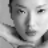

2304


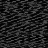

In [ ]:
img = cv2.resize(cv2.cvtColor(faceDataset[0], cv2.COLOR_BGR2GRAY),(48,48))
cv2_imshow(img)
target_img_size = (48, 48)
img = cv2.resize(img.astype('uint8'), target_img_size)
win_size = (24, 24)
cell_size = (8, 8)
block_size_in_cells = (2, 2)

block_size = (block_size_in_cells[1] * cell_size[1],
                  block_size_in_cells[0] * cell_size[0])
block_stride = (cell_size[1], cell_size[0])
nbins = 9  # Number of orientation bins
hog = cv2.HOGDescriptor(win_size, block_size,
                            block_stride, cell_size, nbins)
h = hog.compute(img)
print(len(h))
h.resize(48,48)
cv2_imshow(h*255)
h = h.flatten()

In [ ]:
adaboost = AdaBoostClassifier() #try n_estimators=50, base_estimator=desition tree,learning_rate=1
adaboost.fit(features,y_train)
###
predictions=adaboost.predict(features_test)
print("Report\n",classification_report(y_test, predictions))

Report
               precision    recall  f1-score   support

           0       0.79      0.68      0.73      1002
           1       0.75      0.84      0.79      1134

    accuracy                           0.76      2136
   macro avg       0.77      0.76      0.76      2136
weighted avg       0.77      0.76      0.76      2136

